In [0]:
from os.path import join
from google.colab import drive
# Montar el DRIVE
ROOT = "/content/drive"
drive.mount(ROOT)# Apuntar a la carpeta de trabajo
PROJ = "My Drive/MSI-MSS_project" # This is a custom path.
PROJECT_PATH = join(ROOT, PROJ)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


https://www.datacamp.com/community/tutorials/autoencoder-keras-tutorial#autoencoders

In [0]:
import pandas as pd
import keras
import matplotlib.pyplot as plt
import numpy as np
#import gzip
#%matplotlib inline
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split

In [0]:
subset = pd.read_pickle(join(PROJECT_PATH,'final_subset_BnW.pkl'))

In [0]:
subset.head()

,label,image_array
0,MSI,"[[154, 179, 144, 124, 152, 146, 167, 201, 180,..."
1,MSI,"[[160, 146, 134, 96, 67, 69, 78, 96, 124, 155,..."
2,MSI,"[[246, 241, 236, 216, 173, 164, 158, 162, 164,..."
3,MSI,"[[123, 151, 178, 134, 135, 139, 142, 139, 102,..."
4,MSI,"[[128, 160, 172, 204, 192, 147, 146, 136, 127,..."


In [0]:
X = np.asarray(list(subset["image_array"]))

In [0]:
y = np.concatenate((np.zeros(1000),np.ones(1000)))

In [0]:
# Shapes of training set
print("Training set (images) shape: {shape}".format(shape=X_train.shape))
# Shapes of test set
print("Test set (images) shape: {shape}".format(shape=X_test.shape))

Training set (images) shape: (1600, 224, 224)
Test set (images) shape: (400, 224, 224)


Text(0.5, 1.0, '(Label: 0.0)')

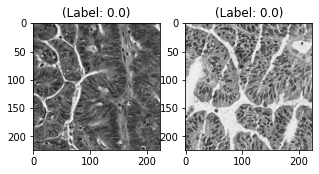

In [0]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(1,2,1)
curr_img = X_train[0]
curr_lbl = y_train[0]
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(curr_lbl) + ")")

# Display the first image in testing data
plt.subplot(122)
curr_img = X_test[0]
curr_lbl = y_test[0]
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(curr_lbl) + ")")


In [0]:
X_train = X_train.reshape(-1, 224,224, 1)
X_test = X_test.reshape(-1, 224,224, 1)
print(X_train.shape, X_test.shape)

(1600, 224, 224, 1) (400, 224, 224, 1)


In [0]:
print(X_train.dtype, X_test.dtype)

uint8 uint8


In [0]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
print(X_train.dtype, X_test.dtype)

float32 float32


In [0]:
print(np.max(X_train), np.max(X_test))

255.0 255.0


In [0]:
X_train = X_train / 255
X_test = X_test / 255

In [0]:
print(np.max(X_train), np.max(X_test))

1.0 1.0


In [0]:
print(X_train.shape, X_test.shape)

(1600, 224, 224, 1) (400, 224, 224, 1)


In [0]:
batch_size = 128
epochs = 50
inChannel = 1
x, y = 224, 224
input_img = Input(shape = (x, y, inChannel))


In [0]:
input_img

<tf.Tensor 'input_1:0' shape=(None, 224, 224, 1) dtype=float32>

In [0]:
def autoencoder(input_img):
    #encoder
    #input = 224 x 224 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #224 x 224 x 32
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #112 x 112 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #112 x 112 x 64
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #56 x 56 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #56 x 56 x 128 (small and thick)

    #decoder
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3) #56 x 56 x 128
    up1 = UpSampling2D((2,2))(conv4) # 112 x 112 x 128
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) # 112 x 112 x 64
    up2 = UpSampling2D((2,2))(conv5) # 224 x 224 x 64
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 224 x 224 x 1
    return decoded

In [0]:
autoencoder = Model(input_img, autoencoder(input_img))
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())

In [0]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 128)       1475

In [0]:
train_X,valid_X,train_ground,valid_ground = train_test_split(X_train,
                                                             X_train, 
                                                             test_size=0.2, 
                                                             random_state=13)

In [0]:
autoencoder_train = autoencoder.fit(train_X, train_ground, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_ground))

Train on 1280 samples, validate on 320 samples
Epoch 1/50
1280/1280 [==============================] - 547s 427ms/step - loss: 0.0451 - val_loss: 0.0272
Epoch 2/50
1280/1280 [==============================] - 541s 422ms/step - loss: 0.0279 - val_loss: 0.0355
Epoch 3/50
1280/1280 [==============================] - 541s 423ms/step - loss: 0.0344 - val_loss: 0.0255
Epoch 4/50
1280/1280 [==============================] - 542s 423ms/step - loss: 0.0258 - val_loss: 0.0237
Epoch 5/50
1280/1280 [==============================] - 541s 423ms/step - loss: 0.0342 - val_loss: 0.0231
Epoch 6/50
1280/1280 [==============================] - 541s 423ms/step - loss: 0.0341 - val_loss: 0.0173
Epoch 7/50
 512/1280 [===========>..................] - ETA: 5:06 - loss: 0.0225

KeyboardInterrupt: ignored